In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


#  Problem Statement: Predict whether a customer will churn (leave theservice) or remain based on their usage patterns, demographics, andcustomer service interactions.

In [77]:
df1 = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#  missing values finding using value_counts and unique()

- here there is no missing values exist but finding missing values using this functions to find any nun values exists 

In [79]:
df1['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [80]:
df1['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [81]:
df1['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [82]:
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [83]:
df1['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [84]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [85]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [86]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'sex' column
df1['Surname'] = le.fit_transform(df1['Surname'])

# Apply LabelEncoder to the 'smoker' column
df1['Geography'] = le.fit_transform(df1['Geography'])

df1['Gender'] = le.fit_transform(df1['Gender'])


df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [87]:
df1['Surname'].value_counts()

Surname
2473    32
2389    29
1689    29
2751    28
336     26
        ..
1307     1
285      1
288      1
2194     1
363      1
Name: count, Length: 2932, dtype: int64

In [88]:
df1['Surname'].unique()

array([1115, 1177, 2040, ..., 1366,   44,  363])

In [89]:
df1['Geography'].value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [90]:
df1['Geography'].unique()

array([0, 2, 1])

In [91]:
df1['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [92]:
df1['Gender'].unique()

array([0, 1])

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [94]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

In [95]:
import matplotlib.pyplot as plt

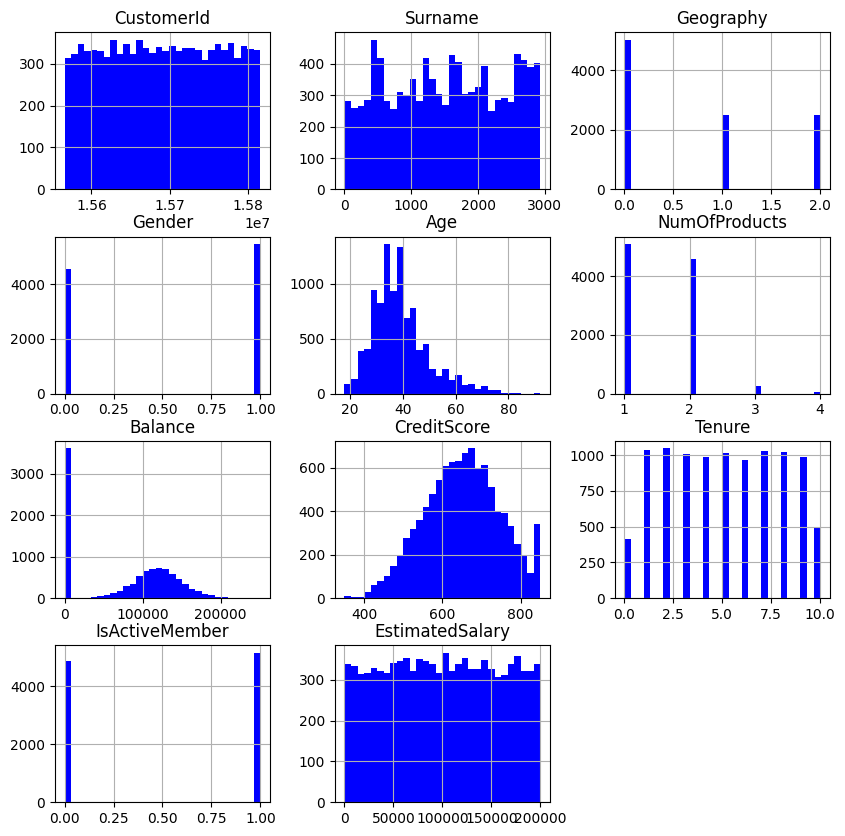

In [96]:
df1[['CustomerId','Surname','Geography','Gender','Age','NumOfProducts','Balance','CreditScore','Tenure','IsActiveMember','EstimatedSalary']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [97]:
import seaborn as sns

<Axes: xlabel='Geography', ylabel='Gender'>

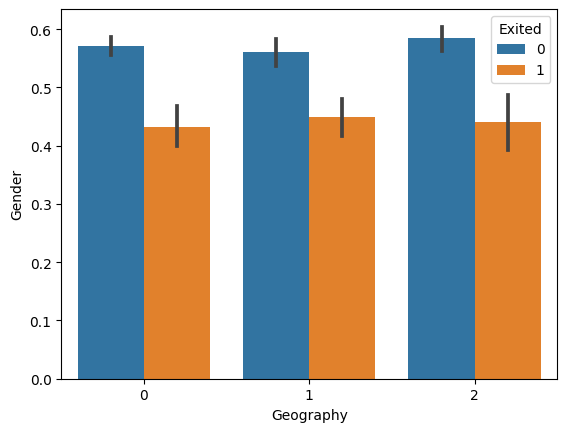

In [98]:
sns.barplot(data = df1,x = 'Geography',y = 'Gender',hue = "Exited")

- here the 0 refers to France'
- and the 1 refers to 'Germany'
- and the 2 refers to 'Spain'

<Axes: >

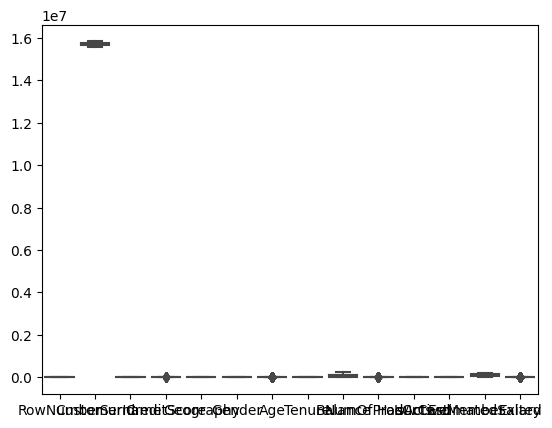

In [99]:
sns.boxplot(data=df1)

In [100]:
df1.drop(['RowNumber'], axis=1, inplace=True)

# Remove outliers

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


In [102]:

def remove_outliers(df1, columns):
    # Calculate the first and third quartiles
    Q1 = df1[columns].quantile(0.25)
    Q3 = df1[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Filter the DataFrame to remove outliers
    df1_filtered = df1[(df1[columns] >= (Q1 - 1.5 * IQR)) & (df1[columns] <= (Q3 + 1.5 * IQR))]
    return df1_filtered


# Specify the columns to clean
columns_to_clean = ['CustomerId','Geography','Surname','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

# Remove outliers
df1_cleaned = remove_outliers(df1, columns_to_clean)

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1_cleaned)

DataFrame after removing outliers:
      CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0       15634602     1115        619.0          0       0  42.0       2   
1       15647311     1177        608.0          2       0  41.0       1   
2       15619304     2040        502.0          0       0  42.0       8   
3       15701354      289        699.0          0       0  39.0       1   
4       15737888     1822        850.0          2       0  43.0       2   
...          ...      ...          ...        ...     ...   ...     ...   
9995    15606229     1999        771.0          0       1  39.0       5   
9996    15569892     1336        516.0          0       1  35.0      10   
9997    15584532     1570        709.0          0       0  36.0       7   
9998    15682355     2345        772.0          1       1  42.0       3   
9999    15628319     2751        792.0          0       0  28.0       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  Estim

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


In [104]:
df1[['CustomerId','Surname','Geography','Gender','Age','NumOfProducts','Balance','CreditScore','Tenure','IsActiveMember','EstimatedSalary','HasCrCard','Exited']].head()

,CustomerId,Surname,Geography,Gender,Age,NumOfProducts,Balance,CreditScore,Tenure,IsActiveMember,EstimatedSalary,HasCrCard,Exited
0,15634602,1115,0,0,42,1,0.00,619,2,1,101348.88,1,1
1,15647311,1177,2,0,41,1,83807.86,608,1,1,112542.58,0,0
2,15619304,2040,0,0,42,3,159660.80,502,8,0,113931.57,1,1
3,15701354,289,0,0,39,2,0.00,699,1,0,93826.63,0,0
4,15737888,1822,2,0,43,1,125510.82,850,2,1,79084.10,1,0


In [105]:
fetr = df1[['CustomerId','Surname','Geography','Gender','Age','NumOfProducts','Balance','CreditScore','Tenure','IsActiveMember','EstimatedSalary','HasCrCard','Exited']]
fetr.head()

,CustomerId,Surname,Geography,Gender,Age,NumOfProducts,Balance,CreditScore,Tenure,IsActiveMember,EstimatedSalary,HasCrCard,Exited
0,15634602,1115,0,0,42,1,0.00,619,2,1,101348.88,1,1
1,15647311,1177,2,0,41,1,83807.86,608,1,1,112542.58,0,0
2,15619304,2040,0,0,42,3,159660.80,502,8,0,113931.57,1,1
3,15701354,289,0,0,39,2,0.00,699,1,0,93826.63,0,0
4,15737888,1822,2,0,43,1,125510.82,850,2,1,79084.10,1,0


In [106]:
trgt = df1['Exited']
trgt.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [107]:
fetr = fetr.drop(columns=['CustomerId', 'Surname'])

In [112]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(fetr, trgt, test_size=0.2, random_state=42)

In [113]:
# Display the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 11)
X_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)


In [116]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# LogisticRegression

In [117]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression(random_state=42)

# Train the model on the scaled training data
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



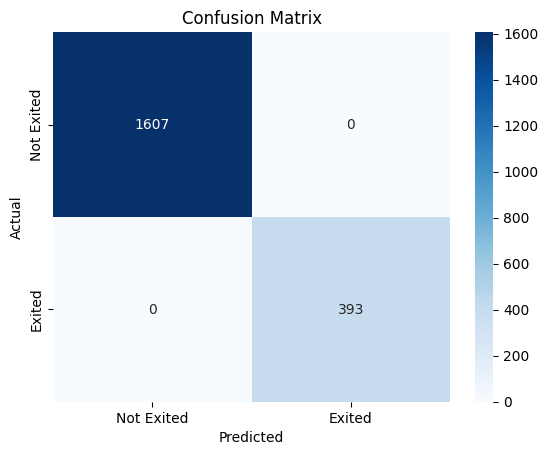

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# RandomForestClassifier

In [134]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [137]:
# Predict the test set labels
y_predrand = clf.predict(X_test_scaled)

In [138]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_predrand)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_predrand))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



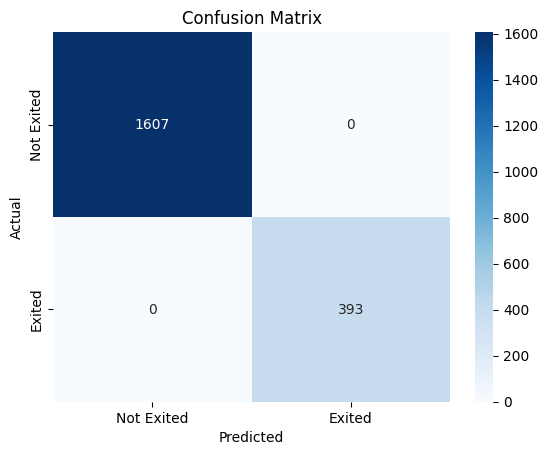

In [133]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Support Vector Machines 

In [129]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [139]:
y_predsvm = svm_clf.predict(X_test_scaled)

In [143]:
print(f"Accuracy: {accuracy_score(y_test, y_predsvm):.4f}")

print(confusion_matrix(y_test, y_predsvm))

print(classification_report(y_test, y_predsvm))

Accuracy: 1.0000
[[1607    0]
 [   0  393]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

